# GRIP: THE SPARKS FOUNDATION

# TASK 2: EXLORING SUPERVISED MACHINE LEARNING

Problem Statement - To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

What will be predicted score if a student study for 9.25 hrs in a day?

In [49]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

# Importing Dataset

In [50]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")
data.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Exploration

In [51]:
data.shape

(25, 2)

In [52]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


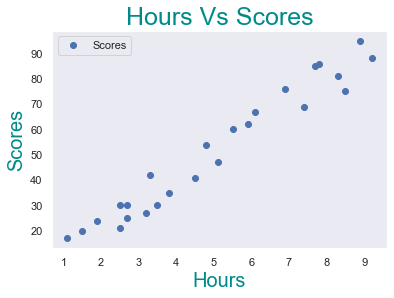

In [54]:
data.plot(x='Hours',y='Scores',style='o')
plt.ylabel('Scores',fontsize=20, color = 'darkcyan')
plt.xlabel('Hours',fontsize=20, color = 'darkcyan')
plt.title('Hours Vs Scores',fontsize=25, color = 'darkcyan')
plt.grid()
plt.show()

# Correlation in Variables

In [55]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

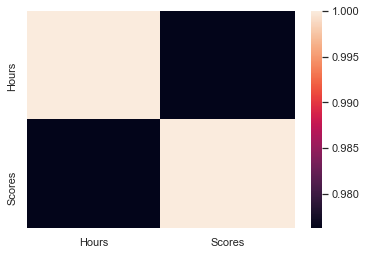

In [56]:
sb.heatmap(data.corr())

Text(0.5, 1.0, 'Scores vs Hours')

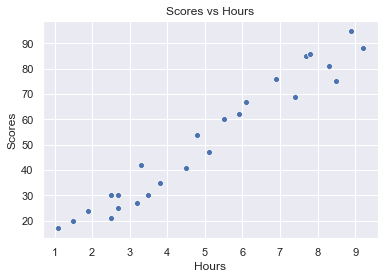

In [57]:
x = data["Hours"]
y = data["Scores"]
sb.scatterplot(x,y)
plt.title("Scores vs Hours")

# Linearity

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

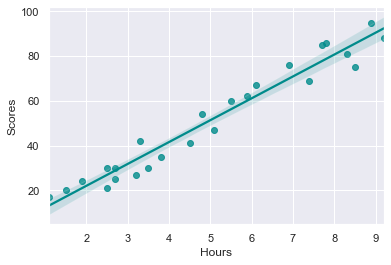

In [58]:
sb.regplot(x=data['Hours'],y=data['Scores'],color='darkcyan')

# Preparing the data

In [59]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                            test_size=0.2, random_state=0)

# Training the Model

In [61]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

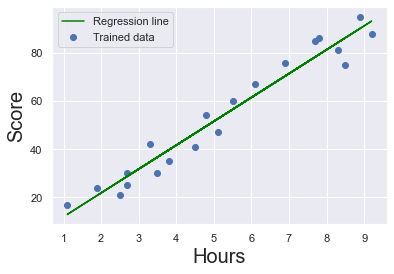

In [62]:
line = (reg.coef_*x_train )+reg.intercept_

plt.plot(x_train, line, c='Green', label='Regression line')
plt.scatter(x_train, y_train,label='Trained data')
plt.xlabel('Hours', fontsize=20)
plt.ylabel('Score', fontsize=20)
plt.legend()

# Prediction 

In [63]:
prediction = reg.predict(X_test)
prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [64]:
df = pd.DataFrame({'Actual':y_test})
df.reset_index(drop=True,inplace=True)
df['Predicted']=prediction
df['Deviation']=abs(df['Actual']-df['Predicted'])
df

,Actual,Predicted,Deviation
0,20,16.884145,3.115855
1,27,33.732261,6.732261
2,69,75.357018,6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


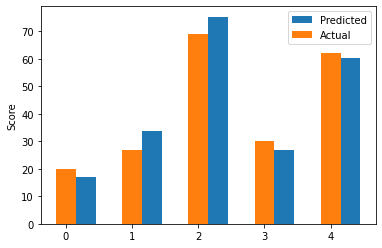

In [42]:
plt.bar(np.arange(5)+0.3,df.Predicted,width=0.3,label='Predicted')
plt.bar(np.arange(5),df.Actual,width=0.3,label='Actual')
plt.ylabel('Score')
plt.legend()

# Making Own Prediction

In [43]:
hours = np.array([9.25])
hours = hours.reshape(-1,1)
pred = reg.predict(hours)
print("No of Hours = " , hours[0][0])
print("Predicted Score = " , pred[0])

No of Hours =  9.25
Predicted Score =  93.69173248737538


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

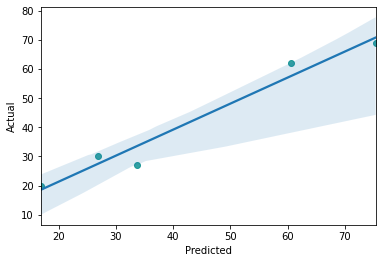

In [44]:
sb.regplot('Predicted','Actual',data=df,scatter_kws={'color':'darkcyan'})

In [47]:
MAE1 = mean_absolute_error(prediction , y_test)
RMSE1 = np.sqrt(mean_squared_error(prediction , y_test))
print('Mean Absolute Error = ',MAE1.round(3))
print('Root Mean Squared Error = ',RMSE1.round(3))

Mean Absolute Error =  4.184
Root Mean Squared Error =  4.647


In [48]:
n = float(input())
Score = reg.predict([[n]])
print ("After Studying For {} Hours, The Estimated Score Should be \n{}".format(n,Score.round(2)))

9.25
After Studying For 9.25 Hours, The Estimated Score Should be 
[93.69]
